In [34]:
import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
from datasets import *
from e2c_model import E2C
from train_e2c import evaluate
model = E2C(1600,2,2,'planar_partial').cuda()
model.load_state_dict(torch.load('result/planar_partial/log_check_valid/model_3000'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [35]:
batch_size = 128
propor = 3/4
dataset = PlanarDataset('./data/data/planar_partial')
train_set, test_set = dataset[:int(len(dataset) * propor)], dataset[int(len(dataset) * propor):]
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=8)

In [36]:
state_loss, next_state_loss = evaluate(model, test_loader)
print ('State loss: ' + str(state_loss))
print ('Next state loss: ' + str(next_state_loss))

State loss: 12.65210761933395
Next state loss: 12.661921219078062


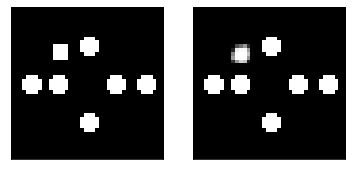

In [67]:
rand_idx = random.randint(0, len(test_set))
x, u, x_next = test_set[rand_idx]
with torch.no_grad():
    x_next_pred = model.predict(x.unsqueeze(0).view(-1,1600).double().cuda(),
                                torch.Tensor(u).unsqueeze(0).double().cuda())
plt.show()
f, axarr = plt.subplots(1,2)
plt.setp(axarr, xticks=[], yticks=[])
axarr[0].imshow(x_next.squeeze(), cmap='gray')
axarr[1].imshow(x_next_pred.squeeze().view(40,40).cpu(), cmap='gray')